# **Melanoma Classification - Final Project Code (Presentation Version)**

*Course*: CS 4774 - Machine Learning

*Authors*: Ramiz Akhtar, Rayaan Faruqi, and Kunaal Sarnaik

*Professor*: Yanjun Qi

*Date*: December 6th, 2020

# **TABLE OF CONTENTS**

*   [Section I](#one): Introduction
*   [Section II](#two): Image Preprocessing and Explatory Data Analysis
*   [Section III](#three): Creating and Training the Convolutional Neural Network Model (DenseNet Architecture)
*   [Section IV](#four): Analyzing CNN Performance on the Testing Set
*   [Section V](#five): Discussion and Conclusion
*   [Section VI](#six): References









-------------------------------------------------------------

<a name="one"></a>
# **I. Introduction**

## ***a) Motivation***
According to the Center for Disease Control (CDC), melanoma is the most serious and deadly type of skin cancer.[$^{1}$](#ref1) The incidence and mortality of invasive melanoma in the United States has risen steadily, with the lifetime risk of developing the disease skyrocketing from 0.03% in 1930 to 1.82% in 2017.[$^{2}$](#ref2) Given that the global incidence and mortality of melanoma are expected to continue increasing at an alarming rate, diagnosing and treating the disease early and efficiently is an urgent priority.[$^{3}$](#ref3) However, as can be observed in **Figure 1** below, distinguishing melanoma not only from other types of skin diseases, but also from benign skin moles (i.e., nevi), at the dermatologist-level is an arduous process that must account for various factors.

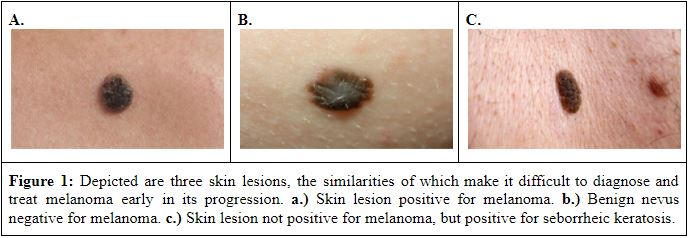

Compounded by the clinical complexities involved when determining the specific stage of a tumor, this difficulty in diagnosing melanoma results in many patients not noticing a potentially fatal tumor appearing on their skin.[$^{4}$](#ref4) Moreover, the current process for diagnosis, which involves presenting to a series of doctors, can not only be expensive but also intimidating for patients. Considering the social, economic, and political determinants of healthcare that additionally belabor the process, the patient may become discouraged and delay diagnosis until a later date. Worse yet, they may delay seeking diagnosis until experiencing an adverse outcome as a result of their endorsed malignancy. Consequently, patients who discover they have invasive melanoma at a later stage often experience worse clinical and financial outcomes, including metastasis, poor prognosis, depression, and higher insurance costs.[$^{5}$](#ref5)

Thus, providing diagnostic information for a potentially fatal melanoma tumor via a smartphone application through utilization of machine learning principles may make early detection more feasible, accessible, and economical by way of reduced treatment costs. Furthermore, such an application may also lead to improved clinical outcomes when it comes to the metastasis and prognosis of an invasive melanoma tumor. Ultimately, by making the first step for diagnosis more convenient, effective, equitable, and accessible, clinical outcomes for patients may improve substantially.




## ***b) Background***

Melanoma arises from genetic mutations in melanocytes, which are the upper layer cells that give skin its pigmentation.[$^{6,7}$](#ref6) Exposure to ultraviolet (UV) radiation from the sun causes greater production of melanin by the melanocytes, effectively darkening the skin to protect it from the UV radiation.[$^{7}$](#ref7) In excess, however, UV radiation triggers mutations in the melanocytes, thereby causing uncontrollable cell growth.[$^{7}$](#ref7) Melanomas may also be hidden and develop in areas that are not exposed to UV light such as between fingers and on the scalp. Therefore, other unknown factors beyond UV light may also contribute to an individual’s risk of developing melanoma.[$^{1}$](#ref1)

Considering that melanoma is the most deadly type of skin cancer, early diagnosis becomes paramount to a positive clinical outcome. However, melanoma is difficult to diagnose because it can develop anywhere on the human body.[$^{1}$](#ref1) Melanoma is often found in the form of a mole but can also occur in normal-looking skin, emphasizing that it can progress undetected. Intuitively, melanoma in moles is comparatively easier to detect than in normal-looking skin.[$^{1}$](#ref1) Initial symptoms of melanoma in moles include asymmetric shape, irregular border, uneven distribution of color, and time-based evolution of any of the aforementioned characteristics.[$^{1}$](#ref1)

Finally, there are several clinical, financial, and psychosocial implications of an untimely melanoma diagnosis that can result in detrimental consequences for the patient. For instance, similar to any other type of cancer, the progression of invasive melanoma is much more difficult to manage clinically in latter stages as the likelihood of metastasis and tumor recurrence increases substantially.[$^{8}$](#ref8) Furthermore, a late diagnosis can result in severe financial distress for the patient due to the sheer urgency, unpredictability, and expense associated with emergent treatment procedures.[$^{9}$](#ref9) Additionally, there are severe mental and psychiatric factors that toll patients while undergoing palliative care treatment associated with melanoma; these include substance abuse, depression, and anxiety.[$^{10}$](#ref10)

## ***c) Claim/Target Task***
The overarching goal of the code outlined in this python notebook is to utilize a supervised multi-class classification algorithm to assess the properties of an image containing indications to either: 

> 1) Melanoma

> 2) Seborrheic Keratosis

> 3) Nevi

An 11-gigabyte Kaggle dataset provided by Pablo Lopez Santori that consists of 2,750 images across these three classifications will be used for training, validation, and testing.[$^{11}$](#ref11) If successful, a novel classification algorithm will be constructed to provide a computational-based diagnosis that will be less costly relative to traditional diagnoses through a healthcare provider with regards to both time and money (**Figure 2**).

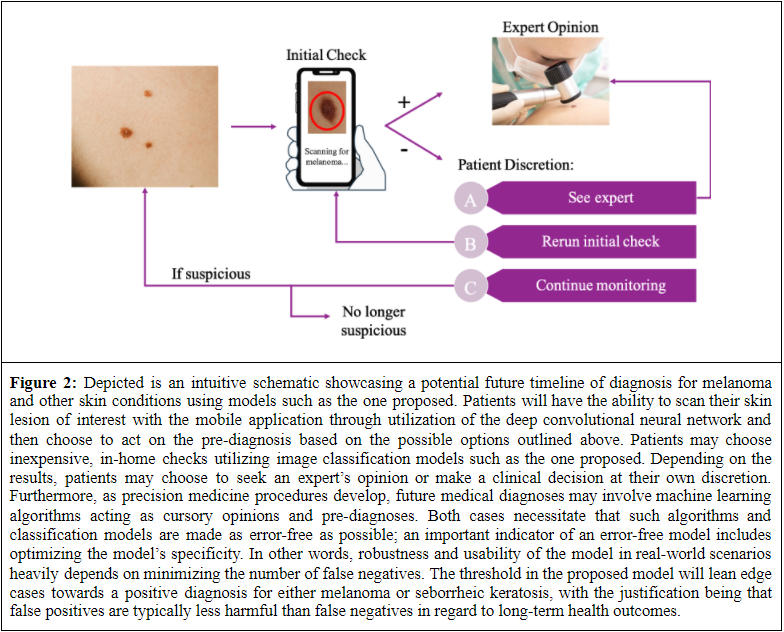

## ***d) Proposed Solution***
We propose to utilize TensorFlow with the Keras API in Python to create a deep Convolutional Neural Network (CNN) based off of the DenseNet image classification architecture. 

In recent years, a consistent observation has been made among machine learning experts utilizing deep convolutional networks: they can be made substantially deeper, more accurate, and efficient to train if they contain shorter connections between the layers close to the input and those close to the output.[$^{12}$](#ref12) Thus, DenseNet, developed by Cornell University researchers Gao Huang, Zhuang Liu, Laurens van der Maaten, and Kilian Weinberger, was created to embrace this observation and connect each layer to every other layer in feed-forward fashion. Traditionally, convolutional neural networks with L layers have L connections. However, the total direct connections possessed by a DenseNet model is as follows: 
<a name="eq1"></a>
> **Equation 1**: $L*(L+2) / 2$, where L is the number of CNN layers.

According to Huang's work, DenseNets have several advantages, including avoidance of the vanishing-gradient problem, strengthening of feature propagation between layers, encouraging feature reuse, and substantially reducing the number of parameters required. Since previous work has supported the claim that DenseNet's typically perform better on relatively small and undersampled datasets, we believed this would be optimal for our project.

Ultimately, we hope to train this DenseNet model on preprocessed images that were subject to data augmentation (image rotation, scaling, shifting, resizing, etc.) and tune it under various hyperparameters (learning rate, growth rate, optimizer, etc.). We then hope to select the best model with respect to the best validation accuracy achieved during training, and then evaluate this model on the testing set.

In selecting our best model, we also hope to optimize model specificity, or in other words, decrease the false positive rate as much as possible for each classification.

## ***e) Configuring Path and Relevant Python Libraries***

The next few code chunks of the python notebook are implemented to configure the path of the dataset ('skin-lesions') and import all python libraries that will be utilized for image preprocessing, model construction, and dataset analysis and visualization.

###*i - Mounting Google Drive and Setting the Path*
The first, third, fourth, and fifth code chunks below are utilized to mount the path in Google Drive and make a variable (*path*) point to the dataset in one of our Drive folders. 

###*ii - Importing Libraries*
As seen in the second code chunk below, the following libraries were utilized in this project to preprocess images, implement the Convolutional Neural Network, and analyze the results of the CNN on the testing dataset. Here is a list of the libraries imported for your convenience:

> *   **NumPy** - Scientific Computing
> *   **Matplotlib** - Python Plotting
> *   **os** - Operating System Tasks
> *   **sys** - Manipulation of Runtime Environment
> *   **random** - Generate Pseudo-random Numbers
> *   **scikit-learn** - Python Machine Learning (utilized for shuffle method)
> *   **keras** - Deep Learning API
> *   **pathlib** - Object-Oriented Filesystem Paths
> *   **cv2** - Importing Images from Path
> *   **statistics** - Mathematical Statistical Functions
> *   **Seaborn** - Data Visualization Library for Heatmap {Confusion Matrix}

NOTE: Not all libraries/modules imported in the code chunk are utilized (e.g., PIL & plotly). These statements were added and then maintained through each version for simplicity.

Finally, using the 'random' library in Python, the seed was set to *42*, so the results can be reproducible across all machines and users.



In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#Standard python imports
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import random

# SKLearn 
from sklearn.utils import shuffle
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

# Keras Models
import keras
from keras.models import Sequential, Model

# Keras Image Pre-Processing
    # https://machinelearningmastery.com/how-to-load-convert-and-save-images-with-the-keras-api/
    # https://machinelearningmastery.com/how-to-configure-image-data-augmentation-when-training-deep-learning-neural-networks/
from keras.preprocessing.image import load_img, img_to_array, array_to_img, ImageDataGenerator

#from keras.models import EfficientNet
    # https://keras.io/api/applications/efficientnet/
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, Dropout, Flatten, Conv2DTranspose, concatenate, Activation, GlobalAveragePooling2D, BatchNormalization, AveragePooling2D
from keras.wrappers.scikit_learn import KerasClassifier


# https://medium.com/@ageitgey/python-3-quick-tip-the-easy-way-to-deal-with-file-paths-on-windows-mac-and-linux-11a072b58d5f
from pathlib import Path

# https://www.pluralsight.com/guides/importing-image-data-into-numpy-arrays
from PIL import Image #for converting images to grayscale, resizing image, trimming image

#OpenCV Library 
import cv2

from statistics import median, mean

import seaborn as sns
import plotly.graph_objects as go

#from google.colab.patches import csv2_imshow
random.seed(42)

from google.colab.patches import cv2_imshow

In [ ]:
#Ramiz's Path
PATH = PATH('/content/gdrive/My Drive/Year 4/ML/CS 4774 Final Project/Final Project Code/skin-lesions/')

In [ ]:
#Rayaan's Path
PATH = Path('/content/drive/My Drive/...')

In [ ]:
#Kunaal's Path
PATH = Path('/content/gdrive/My Drive/CS 4774 Final Project/Final Project Code/skin-lesions/')

-------------------------------------------------------------
-------------------------------------------------------------




<a name="two"></a>
# **II. Image Preprocessing & Exploratory Analysis**

Section II of this notebook implements the preprocessing and exploratory data analysis with respect to the 'skin-lesions' Kaggle dataset.

##***a) Quantifying the Median Image Size***

The following code chunk utilizes the *os*, *cv2*, and *statistics* Python modules/libraries to loop through each image in the dataset and find the median image width and median image height in the dataset.

For clarity, the 'skin-lesions' dataset is split into three paths ('train', 'valid', and 'test') to represent the test-train-validation split. Furthermore, each train split, valid split, and test split are further divided into the three categories ('nevus', 'melanoma', and 'seborrheic_keratosis'). 

In [ ]:
image_widths = []
image_heights = []
image_count = 0

split_path_list = [os.path.join(PATH, "train"), os.path.join(PATH, "valid"), os.path.join(PATH, "test")]
n_mel_sbrk_path_list = ["nevus", "melanoma", "seborrheic_keratosis"]

for split_path in split_path_list:
        for n_mel_sbrk_path in n_mel_sbrk_path_list:
            path = os.path.join(split_path, n_mel_sbrk_path)
            for i in os.listdir(path):
                image_path = os.path.join(path, i)
                image = load_img(image_path, color_mode = "grayscale")
                
                img_size = image.size
                image_widths.append(img_size[0])
                image_heights.append(img_size[1])
                image_count += 1

med_width = int(median(image_widths) / 15)
med_height = int(median(image_heights) / 15)
print("Median Image Size (Scaled Down by 15):", med_width, "x", med_height)
print("Total Images:", image_count)

Median Image Size (Scaled Down by 15): 200 x 133
Total Images: 2750


According to the results of running the code chunk above, the median width of the image dataset was found to be 3008 pixels and the median height was found to be 2000 pixels. Since these image sizes are far too high in magnitude to be analyzed in a computationally efficient way on Google Colaboratory (see [**Section V: Discussion and Conclusion**](#five)), we scaled down the images by 15, which yielded a median width of 200 and a median height of 133.33. Thus, we initially found that an image size of 200x133.33 after loading and resizing the images would not only be representative of the images in the data set, but also allow for training in a timely manner on Google Colaboratory.

Ultimately, we did not use these image sizes, and instead resized our images to **128x128**, since this pixel ratio worked effectively when inputting our images into our DenseNet CNN. This is discussed later in this notebook (see [**Section III: Creating and Training the Convolutional Neural Network Model (DenseNet Architecture)**](#three)

##***b) Loading and Preprocessing Images from Dataset***

The following code chunk repeats the previous code chunk's loop through the 'skin-lesions' dataset, which is stored in the *path* variable, but this time stores the image data in a numpy array. First, each directory of the 'skin-lesions' dataset file is iteratively ran through and the images are resized, normalized, and converted into numpy arrays. The end result of this iterative process is three stacked numpy arrays containing the x-values to be inputted into the subsequent CNN. 

Then, the numpy arrays reflecting the y-values of each image in each split were created. Essentially, these y-values represent the class of the image, where '0' represents nevus, '1' represents melanoma, and '2' represents seborrheic keratosis. The x-value numpy arrays and y-value numpy arrays were then stacked on top of each other and shuffled before being returned from the **getData()** function.

The **loadImages()** function is implemented to read all images from the specific directory (e.g., 'train/melanoma/'), resize the images to 128x128 pixels$^{2}$, and normalize the pixel RGB values from 0 to 1.

Finally, the **np.savez** function in the NumPy library is utilized to store these numpy arrays in a Google Drive file, such that the images do not have to be loaded each time the code is run, which is a computationally and time expensive process. Thus, once this code chunk is executed one time with the *runPickle* boolean variable set to **True**, the boolean variable can now be set to **False**, and the numpy arrays stored in the directly will instead be utilized.

In [ ]:
IMG_WIDTH=128
IMG_HEIGHT=128

train_path = "train"
valid_path = "valid"
test_path = "test"

def get_data(path_name):
        
    #join the path and the specific directory (train/valid/test) we're looking at
    split_path = os.path.join(PATH, path_name) 
    
    #Make relevant paths for the nevus, melanoma, and sbrk sub-directories in the current path
    nevus_path = os.path.join(split_path, "nevus")
    melanoma_path = os.path.join(split_path, "melanoma")
    sbrk_path = os.path.join(split_path, "seborrheic_keratosis")

    #loadImages will return an array of image arrays for each path 
    nevus_arr = loadImages(nevus_path)
    melanoma_arr = loadImages(melanoma_path)
    sb_arr = loadImages(sbrk_path)

    #set up classification matrices
    nevus_y = [0]*len(nevus_arr)
    melanoma_y = [1]*len(melanoma_arr)
    sb_y = [2]*len(sb_arr)
    
    #combine
    x = np.concatenate((nevus_arr, melanoma_arr, sb_arr), axis=0)
    y = nevus_y + melanoma_y + sb_y
    y = np.asarray(y)

    #shuffle the coupled data
    xData, yData = shuffle(x, y)
    #Return statement
    return xData, yData

def loadImages(path):
  retArr = []
  print("Path is: ", path)
  for i in os.listdir(path):
      #Load each image in path
      path_i = os.path.join(path, i)
      img = cv2.imread(path_i, cv2.IMREAD_COLOR)

      #Resizing images to 256 x 256
      #https://www.tutorialkart.com/opencv/python/opencv-python-resize-image/
      img_resized = cv2.resize(img, (IMG_WIDTH, IMG_HEIGHT))

      #normalize image pixels from 0 to 1
      #https://stackoverflow.com/posts/39037135/edit    
      norm_image = cv2.normalize(img_resized, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)

      retArr.append(norm_image)
  retArr = np.asarray(retArr)
  return retArr

# x_train, y_train = get_data(train_path)
# x_valid, y_valid = get_data(valid_path)
# x_test, y_test = get_data(test_path)

runPickle = False
picklePath = '/content/gdrive/My Drive/CS 4774 Final Project/Final Project Code/objs.npz' #path for pickle to be run
if (runPickle):
    x_train, y_train = get_data(train_path)
    x_valid, y_valid = get_data(valid_path)
    x_test, y_test = get_data(test_path)

    with open(picklePath, 'wb') as f:
      np.savez(f, x_train=x_train, y_train=y_train, x_valid=x_valid, y_valid=y_valid, x_test=x_test, y_test=y_test)
else:
    npzfile = np.load(picklePath)

    x_train = npzfile['x_train']
    y_train = npzfile['y_train']
    x_valid = npzfile['x_valid']
    y_valid = npzfile['y_valid']
    x_test = npzfile['x_test']
    y_test = npzfile['y_test']

The execution of the code chunk above results in six numpy arrays being created: *x_train*, *y_train*, *x_valid*, *y_valid*, *x_test*, and *y_test*. The x and y prefix for these numpy arrays represent whether the numpy array is referencing the image itself or the class of the image, respectively. The train, valid, and test suffix of the numpy arrays, on the other hand, represent the split that they belong to. The train and valid-suffixed numpy arrays will be utilized to learn the DenseNet CNN, while the test numpy arrays will be utilized to validate its effectiveness in classifying the skin images.

##***c) Visualizing the Class Distribution of Images in each Split***

The following code chunk was implemented in order to visualize the class distribution of the images in each split ('train', 'valid', and 'test'). The **getClassDistribution()** method was implemented in order to obtain this visualization. The function accepts the y-value numpy arrays of each split, which is intuitive since we are only representing the class distribution in the visualization.

The function iteratively indexes the inputted numpy arrays to find out the frequency of each class in each split. Then, these counts are printed out before being inputted into a bar graph through utilization of the 'matplotlib' library. Finally, the bar graph showcases the distribution of the 'skin-lesions' dataset, with the xticks representing the split ('train', 'validation', and 'test', respectively), and the yticks representing the frequency, or count, of each class the respective split.

Nevus Counts:
	Train - 1372 Images
	Validation - 78 Images
	Test - 393 Images

Melanoma Counts:
	Train - 374 Images
	Validation - 30 Images
	Train - 117 Images

Seborrheic Keratosis Counts: 
	Train - 254 Images
	Validation - 42 Images
	Test - 90 Images


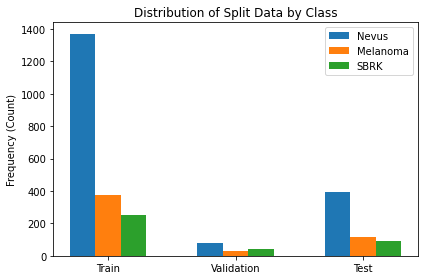

In [ ]:
def getClassDistribution(ytrain, yvalidation, ytest):
    nevus_train=0
    mel_train=0
    sbrk_train=0
    nevus_val=0
    mel_val=0
    sbrk_val=0
    nevus_test=0
    mel_test=0
    sbrk_test=0

    for i in range(len(ytrain)):
        if ytrain[i]==0:
            nevus_train+=1
        if ytrain[i]==1:
            mel_train+=1
        if ytrain[i]==2:
            sbrk_train+=1

    for i in range(len(yvalidation)):
        if yvalidation[i]==0:
            nevus_val+=1
        if yvalidation[i]==1:
            mel_val+=1
        if yvalidation[i]==2:
            sbrk_val+=1
            
    for i in range(len(ytest)):
        if ytest[i]==0:
            nevus_test+=1
        if ytest[i]==1:
            mel_test+=1
        if ytest[i]==2:
            sbrk_test+=1    

    nevus_counts=[nevus_train, nevus_val, nevus_test]
    mel_counts=[mel_train, mel_val, mel_test]
    sbrk_counts=[sbrk_train, sbrk_val, sbrk_test]
    print("Nevus Counts:")
    print("\tTrain -", nevus_counts[0], "Images")
    print("\tValidation -", nevus_counts[1], "Images")
    print("\tTest -", nevus_counts[2], "Images")
    print("\nMelanoma Counts:")
    print("\tTrain -", mel_counts[0], "Images")
    print("\tValidation -", mel_counts[1], "Images")
    print("\tTrain -", mel_counts[2], "Images")
    print("\nSeborrheic Keratosis Counts: ")
    print("\tTrain -", sbrk_counts[0], "Images")
    print("\tValidation -", sbrk_counts[1], "Images")
    print("\tTest -", sbrk_counts[2], "Images")

    labels = ['Train', 'Validation', 'Test']

    x = np.arange(len(labels))
    width = 0.20

    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width, nevus_counts, width, label = 'Nevus')
    rects2 = ax.bar(x, mel_counts, width, label = 'Melanoma')
    rects3 = ax.bar(x + width, sbrk_counts, width, label = 'SBRK')

    ax.set_ylabel('Frequency (Count)')
    ax.set_title('Distribution of Split Data by Class')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()

    fig.tight_layout()
    plt.show()

getClassDistribution(y_train, y_valid, y_test)

<a name="dist"></a>
The output above displays the results of the previous code chunk. First, the frequencies of the images by class in each split dataset are printed to the console for a quantitative comparison. Then, these quantitative counts were converted into a 2-D grouped bar graph for a qualitative comparison, where blue bars indicate Nevus image frequencies, orange bars indicate Melanoma image frequencies, and green bars indicate Seborrheic Keratosis image frequencies.

As can be seen in both the quantitative and qualitative portions of this distribution analysis, nevus images completely dominate the dataset, with over half the images in the train set belonging to the nevus class. This is an inherent limitation of our analysis (See [**Section V: Discussion and Conclusion**](#five) for more on this). 

-------------------------------------------------------------
-------------------------------------------------------------




<a name="three"></a>
# **III. Creating and Training the Convolutional Neural Network Model (DenseNet Architecture)**

Section III of this notebook showcases how the DenseNet CNN Architecture was constructed, how its hyperparameters were tuned, what the best resulting DenseNet CNN Architecture was based on the hyperparameter tuning, and the validation losses and accuracies of this "best" model as a function of the number of epochs.

## ***a) Creating the DenseNet CNN Architecture***

NOTE: We based our implementation on a notebook provided by Kaggle user Sohaib Anwaar.[$^{13}$](#ref13)

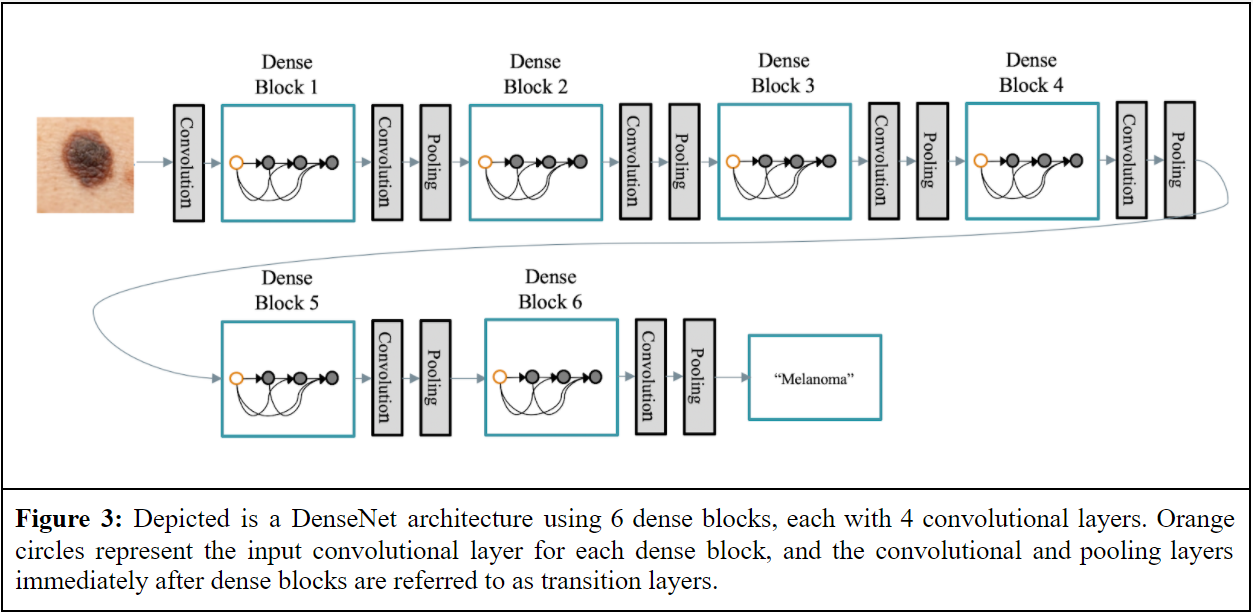

The DenseNet Architecture (**Figure 3**) typically consists of three different sections:

###1) Dense Blocks

Dense Blocks consist of convolution layers succeeded by a transition layer to proceed to the next dense block. Every layer in a dense block is directly connected to all its subsequent layer (See [**Equation 1**](#eq1) above). Dense Blocks represent the cornerstone of the DenseNet architecture, as they are the sections that down-sample layers to change the size of feature maps. For our DenseNet architecture, we used 6 Dense Blocks with 4 layers in each block.

###2) Convolutional Layers

Convolutional Layers reside within the dense blocks, and each one consists of three consecutive operations: a) batch normalization, b) rectified linear unit, and c) 3x3 convolution. Dropout layers were also added to randomly drop 20% of the data to increase the generalizability of the DenseNet architectural system. 

###3) Transition Blocks

Translation Blocks perform batch normalization, followed by a rectified linear unit and a 1x1 convolution instead of the previously mentioned 3x3 convolution in the convolutional layers. This 1x1 convolution acts as a bottleneck layer to reduce the number of input feature maps and improve computational efficiency.


The following code chunk showcases the Python code we utilized to create our DenseNet Architecture. From top to bottom, functions for the convolutional layer, dense block, and transition block are defined and then combined into a fully-functional DenseNet CNN model through utilization of the lattermost function.

In [ ]:
def conv_layer(conv_x, filters):
    conv_x = BatchNormalization()(conv_x)
    conv_x = Activation('relu')(conv_x)
    conv_x = Conv2D(filters, (3, 3), kernel_initializer='he_uniform', padding='same', use_bias=False)(conv_x)
    conv_x = Dropout(0.2)(conv_x)

    return conv_x


def dense_block(block_x, filters, growth_rate, layers_in_block):
    for i in range(layers_in_block):
        each_layer = conv_layer(block_x, growth_rate)
        block_x = concatenate([block_x, each_layer], axis=-1)
        filters += growth_rate

    return block_x, filters


def transition_block(trans_x, tran_filters):
    trans_x = BatchNormalization()(trans_x)
    trans_x = Activation('relu')(trans_x)
    trans_x = Conv2D(tran_filters, (1, 1), kernel_initializer='he_uniform', padding='same', use_bias=False)(trans_x) #bottleneck layer
    trans_x = AveragePooling2D((2, 2), strides=(2, 2))(trans_x)

    return trans_x, tran_filters


def dense_net(filters, growth_rate, classes, dense_block_size, layers_in_block):
    input_img = Input(shape=(IMG_HEIGHT, IMG_WIDTH, 3))
    x = Conv2D(24, (3, 3), kernel_initializer='he_uniform', padding='same', use_bias=False)(input_img)

    dense_x = BatchNormalization()(x)
    dense_x = Activation('relu')(x)

    dense_x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(dense_x)
    for block in range(dense_block_size - 1):
        dense_x, filters = dense_block(dense_x, filters, growth_rate, layers_in_block)
        dense_x, filters = transition_block(dense_x, filters)

    dense_x, filters = dense_block(dense_x, filters, growth_rate, layers_in_block)
    dense_x = BatchNormalization()(dense_x)
    dense_x = Activation('relu')(dense_x)
    dense_x = GlobalAveragePooling2D()(dense_x)

    output = Dense(classes, activation='softmax')(dense_x)

    return Model(input_img, output)

## ***b) Iteratively Creating Models with Hyperparameters and Selecting the Best***

The following code chunk represents the functions we utilized to create and train any given CNN model (utilizing the DenseNet architecture outlined previously), and tune the CNN model to various hyperparameters. These functions are called **create_and_train_cnn()** and **train_and_select_model**, respectively.

###**create_and_train_cnn()**

This function takes in the x_train, y_train, x_val, and y_val preprocessed image numpy arrays, as well as a dictionary of hyperparameters (*args*) to create a given DenseNet CNN model, which is tuned according to the *args* passed into the function. The model is then compiled through utilization of the Keras API and the 'categorical_crossentropy' loss function. Then, through utilization of the **ImageDateGenerator** class in the Keras API, the x_train images are automatically augmented (rotation, shifting, scaling, randomized zooming, etc.) and fed into the model for training. The **fit()** function in the Keras API does this, while also repeatedly validating the train based on the validation data inputted. The **fit()** function also accepts a specific *batch_size* argument, which was set to 32, as well as a *epochs* argument, which was set to 12.

###**train_and_select_model()**

This function accepts the training and validation data, and calls the previously mentioned **create_and_train_cnn()** model on different hyperparameters. The following is a list of the hyperparameters that were altered, as well as the values that they were iterated through:

*   **Batch Size** - Determines the number of samples in each mini-batch. Value(s): 32
*   **Epochs** - Arbitrary cutoff generally defined as one pass over the entire train dataset. Value(s): 12
*   **Learning Rate** - Controls how much to change the model in response to the estimated error each time model weights are updated. Value(s): [0.001, 0.0001, 0.00001]
*   **Optimizer** - Update the model in response to the outpout of the loss function. Value(s): ['adam', 'nadam', 'adam']
*   **Growth Rate** -  Refers to the growth rate of the dense block, or in other words, how many feature maps each dense block successively adds per layer within (e.g., the $l^{th}$ layer has $k_0 + K(l-1)$ input feature maps, where $k$ is growth rate). Value(s): [6, 12, 16, 24]

*Note #1: The activation function hyperparameter was not tuned, as the the DenseNet relies on specific activation functions for each block and layer (e.g., 'relu' within the dense blocks, followed by a final Dense layer with a 'softmax' activation function.*

*Note #2: When following the code chunk below, one can observe that lines 19-25 were commented out. These lines comprised the traditional CNN that was once trained on the data, but this simple architecture was no longer utilized after achieving higher validation accuracies through utilization on the DenseNet CNN architecture.*

The **train_and_select_model()** function also tracks the best model across each iteration with respect to the maximum validation accuracy obtained by that model. Furthermore, it tracks a dictionary of the best hyperparameter set used in that model. Finally, the function returns the best model, best history, best validation accuracy, and best hyperparameter set, which are stored in the *b_model, b_history, b_valid_acc,* and *b_hyper_set* variables, respectively.

In [ ]:
#Method to create the CNN Model
def create_and_train_cnn(x_train, y_train, x_val, y_val, args=None):

  x_train = x_train.reshape(len(x_train), IMG_WIDTH, IMG_HEIGHT, 3)
  x_val = x_val.reshape(len(x_val), IMG_WIDTH, IMG_HEIGHT, 3)

  y_train = keras.utils.to_categorical(y_train, num_classes=3)
  y_val = keras.utils.to_categorical(y_val, num_classes=3)
  
  input_shape = (IMG_WIDTH, IMG_HEIGHT, 3)

  dense_block_size = 6 #3,6, 4
  layers_in_block = 4

  growth_rate = args['growth_rate']
  classes = 3

  # #Traditional CNN Model
  # model = Sequential()
  # model.add(Conv2D(filters=128, activation=args['activation_func'], kernel_size=3, input_shape=input_shape))
  # model.add(MaxPooling2D(pool_size=(3,3), strides=(1,1)))
  # model.add(Flatten())
  # model.add(Dropout(0.2))
  # model.add(Flatten())
  # model.add(Dense(units=3, activation=args['activation_func']))

  model = dense_net(growth_rate * 2, growth_rate, classes, dense_block_size, layers_in_block)
  
  #can try optimizer as 'adam', 'sgd', 'adadelta', 'adagrad', 'nadam', 'adamax', and more
  model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=args['opt'])          #Review what is the best loss function for this

  #create generator and iterator
  generator = ImageDataGenerator()
  itr = generator.flow(x_train, y_train)

  print(args['batch_size'])

  #train model for given epochs with given batch_size
  history = model.fit(x=itr, batch_size=args['batch_size'], epochs=args['epochs'], validation_data=(x_val, y_val))

  return model, history

#Method to train and select the CNN Model given the parameters specified.
def train_and_select_model(x_train, y_train, x_validation, y_validation):
    args = {
        'batch_size': 32,
        'epochs': 12, 
        #'activation_func': 'softmax',
    }

    best_valid_acc = 0
    best_hyper_set = {}

    counter = 0
    for learning_rate in [0.001, 0.0001, 0.00001]: #
        for opt in ['adamax', 'nadam', 'adam']: 
            for growth_rate in [6, 12, 16, 24]: #12, 16, 
                args['learning_rate'] = learning_rate
                args['opt'] = opt
                args['growth_rate'] = growth_rate
                counter += 1

                print("Creating and training model with learning rate: ", learning_rate,
                 ", optimizer: ", opt, ", growth rate: ", growth_rate)
                print("Run Number: ", counter, "/36")

                model, history = create_and_train_cnn(x_train, y_train, x_validation, y_validation, args)

                validation_accuracy = history.history['val_accuracy']

                max_validation_accuracy = max(validation_accuracy)
                if max_validation_accuracy > best_valid_acc:
                    best_model = model
                    best_history = history
                    best_valid_acc = max_validation_accuracy
                    best_hyper_set['learning_rate'] = learning_rate
                    best_hyper_set['opt']  = opt
                    best_hyper_set['growth_rate'] = growth_rate
        
    return best_model, best_history, best_valid_acc, best_hyper_set

b_model, b_history, b_valid_acc, b_hyper_set = train_and_select_model(x_train, y_train, x_valid, y_valid)

##***c) Summary of the Best Model***

The code chunk below prints the architecture of the best DenseNet CNN, as determined by the best validation accuracy obtained, to the console.

In [ ]:
print(b_model.summary())

Model: "functional_121"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_62 (InputLayer)           [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
conv2d_1183 (Conv2D)            (None, 128, 128, 24) 648         input_62[0][0]                   
__________________________________________________________________________________________________
activation_1230 (Activation)    (None, 128, 128, 24) 0           conv2d_1183[0][0]                
__________________________________________________________________________________________________
max_pooling2d_74 (MaxPooling2D) (None, 64, 64, 24)   0           activation_1230[0][0]            
_____________________________________________________________________________________

The output above depicts the successive layers of the DenseNet CNN architecture. Through qualitatively investigating the table, one can determine the input and output shapes of each layer. Furthermore, as can be observed in the penultimate row, the quantity of total parameters, trainable parameters, and non-trainable parameters of the model were **605811, 595731, and 10080**, respectively. Herein signifies the impressive nature of the DenseNet architecture, as it was able to effectively operate with a relatively small number of parameters.

##***d) Best Hyperparameter Results***

The following code chunks prints out the tuned hyperparameters of the best DenseNet CNN model, as determined by the validation accuracy shown on the first line.

In [ ]:
print("Best validation accuracy:", b_valid_acc)
print("Best Learning Rate:", b_hyper_set['learning_rate'])
print("Best Optimizer:", b_hyper_set['opt'])
print("Best Growth Rate:", b_hyper_set['growth_rate'])

Best validation accuracy: 0.7133333086967468
Best Learning Rate: 0.001
Best Optimizer: adam
Best Growth Rate: 12


The hyperparameters that achieved the best validation accuracy (**71.33%**) out of all models trained possessed a learning rate of **0.001**, an optimizer which utilized the **adam** algorithm, and a growth rate of **12**.

## ***e) Visualizing Loss and Validation Accuracy History of Best CNN Model***

The following code chunk plots the loss and validation accuracy of the best model as a function of the number of epochs. The train loss, validation loss, train accuracy, and validation accuracy statistics are obtained from the history outputted by the best model through execution of the **train_and_select_model()** function outlined previously. The **plot_history()** function below plots these as a function of the number of epochs.

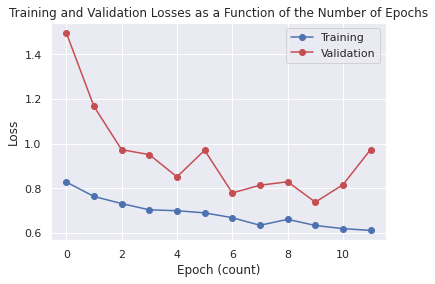

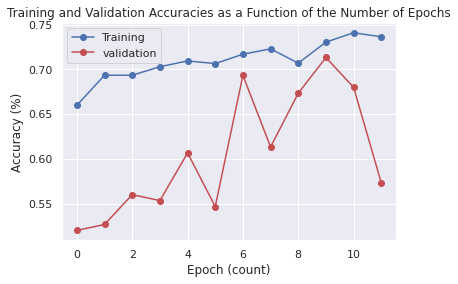

In [ ]:
def plot_history(history):
    train_loss_history = history.history['loss']
    validation_loss_history = history.history['val_loss']
    
    train_acc_history = history.history['accuracy']
    validation_acc_history = history.history['val_accuracy']

    plt.plot(train_loss_history, '-ob')
    plt.plot(validation_loss_history, '-or')
    plt.xlabel("Epoch (count)")
    plt.ylabel("Loss")
    plt.legend(["Training", "Validation"])
    plt.title("Training and Validation Losses as a Function of the Number of Epochs")
    plt.show()

    print("\n")

    plt.plot(train_acc_history, '-ob')
    plt.plot(validation_acc_history, '-or')
    plt.xlabel("Epoch (count)")
    plt.ylabel("Accuracy (%)")
    plt.legend(["Training", "validation"])
    plt.title("Training and Validation Accuracies as a Function of the Number of Epochs")
    plt.show()

plot_history(b_history)

As depicted in the plots above, the training and validation losses follow a relatively smooth decreasing trend as the number of epochs successively increases, which is typically expected when training a convolutional neural network. The training and validation accuracies also follow the expected trend of increasing over successive additions of epochs. However, it is distinctly observed throughout both plots that the validation loss, and especially the validation accuracy, possesses high variance across successive epochs. This typically indicates suboptimal robustness and generalizability of our model, yet it can be attributed to the numerous limitations present in this analysis,  from limited computational resources to the image dataset itself (see [**Section V: Discussion and Conclusion**](#five)). 

-------------------------------------------------------------
-------------------------------------------------------------






<a name="four"></a>
# **IV. Analyzing CNN Performance on the Testing Set**

Section IV of this notebook showcases an analysis of the best model's validation through utilization of the testing set. In doing so, Section IV reports the total model accuracy, visualizes a confusion matrix, and determines the accuracy, precision, recall (sensitivity), specificity, and F1-score of the best model with respect to each class (i.e., nevus, melanoma, and seborrheic keratosis)

##***a) Generating Model Predictions and Quantifying Overall Accuracy***

The following code chunk outlines the **evaluate_model()** function, which was utilized to: 1) calculate the overall testing accuracy that our model achieved, and 2) create a confusion matrix reflecting the results of the multiclass classification. The function accepts a *predictions* parameter and a *y_test* parameter, which are both numpy arrays. The *predictions* parameter is obtained through calling the **predict()** function within the Keras deep learning API on the best model that was previously outputted by the **train_and_select_model()** function. The output of the **predict()** function, given that this is multiclass classification, is a 600x3 numpy array, where the 600 rows represent each image in the array and the 3 columns represent the probability of each image to belong to class 0 (nevus), class 1 (melanoma), and class 2 (seborrheic keratosis). On the other hand, the *y_test* parameter is simply a 600x1 numpy array of the class 0, 1, or 2 for each image.

Thus, the **evaluate_model()** function iteratively loops through each row of the numpy arrays inputted and determines whether the class predicted by the model matches the actual class of the image given by *y_test*. If so, the *num_correct* local variable is incremented. Furthermore, the iteration through the numpy arrays increments counts in the confusion matrix, the result of which can be observed in the ensuing section.

Finally, the overall accuracy of the model is calculated, as given by the following equation: 

> **Equation 2**: $Accuracy = numCorrect / 600$

In [ ]:
def evaluate_model(predictions, y_test):
    num_correct = 0

    #Confusion Matrix Set
    confusion_matrix = np.zeros((3, 3), dtype=int)

    for i in range(len(predictions)):
        if np.argmax(predictions[i]) == y_test[i]:
            num_correct += 1

        confusion_matrix[np.argmax(predictions[i])][y_test[i]] += 1

    accuracy = (float(num_correct)) / (float(len(predictions)))

    return accuracy, confusion_matrix

y_predictions = b_model.predict(x_test)

test_accuracy, conf_matrix = evaluate_model(y_predictions, y_test)
print("Testing Accuracy: \n", test_accuracy)
#print("\nConfusion Matrix: \n", conf_matrix)

Testing Accuracy: 
 0.6366666666666667

Confusion Matrix: 
 [[340  99  51]
 [  9   9   6]
 [ 44   9  33]]


As depicted in the output above, the overal testing accuracy achieved by our best DenseNet CNN Model was calculated to be **0.6367**, or **63.67%**. This accuracy demonstrates considerable improvement from guessing by random chance, which would theoretically obtain an accuracy of 33.33% due to the 3 classifications. However, the testing accuracy achieved possesses substantial room for improvement in order to be considered robust and generalizable. Iterative developments, enhancements, and tuning must be performed on the DenseNet if it has any hope of being implemented in a mobile application for real-world usage. See [**Section V: Discussion and Conclusion**](#five) for further discussion on errors, limitations, and future research.

##***b) Confusion Matrix Heatmap***

This section utilizes the **Seaborn** Python package to visualize the confusion matrix outputted by the previous code chunk as a heatmap.

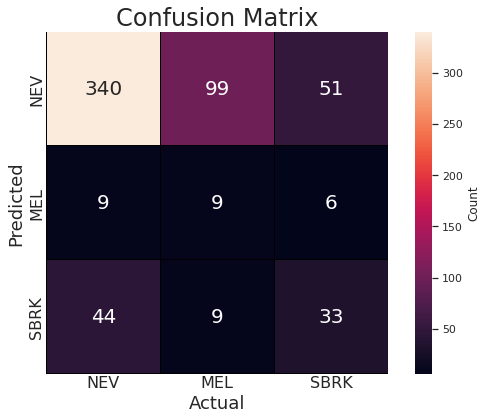

In [ ]:
def plot_confusion(confusion_matrix):
    confusion_labels = ['NEV', 'MEL', 'SBRK']

    sns.set()
    fig, ax = plt.subplots(figsize=(8,6))
    ax = sns.heatmap(confusion_matrix, annot=True, fmt='d', square=True, ax=ax, annot_kws={"fontsize":20}, 
    linecolor="black", linewidth=0.1, xticklabels=confusion_labels, yticklabels=confusion_labels, cmap="rocket", cbar_kws={'label':'Count'})
    
    plt.setp(ax.get_xticklabels(), fontsize=16, va='center', ha='center')
    plt.setp(ax.get_yticklabels(), fontsize=16, va='center', ha='center')
    
    plt.ylabel('Predicted', fontsize=18)
    plt.xlabel('Actual', fontsize=18)

    ax.set_title("Confusion Matrix", fontsize=24)
    fig.tight_layout()
    plt.show()

plot_confusion(conf_matrix)

As depicted above, the current model that was outputted by the **train_and_select_model()** function achieved a relatively skewed confusion matrix which tended to avoid melanoma classifications. Given that the distribution plot (see [subsection c in **Section II: Image Preprocessing & Exploratory Analysis**](#dist) qualitatively demonstrated that the 'skin-lesions' dataset possessed a substantial amount of nevus images relative to those of the other classes, this skew can be attributed to the heavy imbalance of the dataset utilized.

##***c) Obtaining Class Accuracy, Precision, Recall (Sensitivity), Specificity, and F1-Score Metrics from the Model***

The following code chunks in this section demonstrate further quantitative evaluation of the model, but with respect to each class. The metrics evaluated in this section are class accuracy, precision, recall (sensitivity), specificity, and F1-score. To quantify such metrics, the quantity of true positives, true negatives, false positives, and false negatives resulting from comparison of the model's predicted class to the actual image class must first be evaluated. 

The following is an in-depth discussion of all the metrics outlined above. First, we define the four quantities primarily evaluated before the other metrics can be quantified:

*   **True Positive (TP)** - Quantity of predictions where the classifier correctly predicts the positive class as positive (e.g., predicting nevus when an image is nevus).
*   **True Negative (TN)** - Quantity of predictions where the classifier correctly predicts the negative class as negative (e.g., predicting not nevus when an image is not nevus).
*   **False Positive (FP)** - Quantity of predictions where the classifier incorrectly predicts the negative class as positive (e.g., predicting nevus when an image is not nevus).
*   **False Negative (FN)** - Quantity of predictions where the classifier incorrectly predicts the positive class as negative (e.g., predicting not nevus when an image is nevus).


In the code chunks below, the quantity of true positives, true negatives, false positives, and false negatives for each class are inputted into **Equations 3-7** to calculate that respective class's accuracy, precision, recall, specificity, and F1-Score, respectively.[$^{14}$](#ref14) **Equations 3-7** are depicted below:

> **Equation 3**: $Accuracy = (TP + TN) / (TP + TN + FP + FN)$

**Accuracy** is a measure of the fraction of the total samples of the class that were correctly classified by the classifier.

> **Equation 4**: $Precision = TP / (TP + FP)$

**Precision** showcases the fraction of predictions as a positive class that were actually positive.

> **Equation 5**: $Recall = TP / (TP + FN)$

**Recall**, also known as sensitivity, true positive rate, or probability of detection, measures the fraction of positive samples that were correctly classified as positive by the classifier.

> **Equation 6**: $Specificity = TN / (TN + FP)$

**Specificity**, also known as the true negative rate, measures the fraction of all negative samples that were correctly predicted as negative by the classifier.

> **Equation 7**: $F1 = (2)*(Precision)*(Recall) / (Precision + Recall)$

**F1-Score**, mathematically known as the harmonic mean of precision and recall, combines precision and recall into a single measure. Ideally, we would like to obtain an F1-Score as close to 1 for each class as possible.



###*i - Analyzing the Nevus Images Predicted by the Classifier*

This section showcases the class accuracy, precision, recall, specificity, and F-1 Score metrics calculated for our model from the nevus class.

In [ ]:
def getNevusAnalysis(confusion_matrix):
    nevus_TP = float(confusion_matrix[0][0])
    nevus_TN = float(confusion_matrix[1][1]+confusion_matrix[1][2]+confusion_matrix[2][1]+confusion_matrix[2][2])

    nevus_FP = float(confusion_matrix[0][1]+confusion_matrix[0][2])
    nevus_FN = float(confusion_matrix[1][0]+confusion_matrix[2][0])

    nevus_accuracy = ((nevus_TP+nevus_TN) / (nevus_TP+nevus_TN+nevus_FP+nevus_FN))
    nevus_precision = (nevus_TP) / (nevus_TP + nevus_FP)
    nevus_recall = (nevus_TP) / (nevus_TP+nevus_FN)
    nevus_specificity = 1 - ((nevus_FP) / (nevus_FP+nevus_TN))

    nevus_effone = (((2)*(nevus_recall)*(nevus_precision)) / (nevus_recall + nevus_precision))

    return [nevus_accuracy, nevus_precision, nevus_recall, nevus_specificity, nevus_effone]

nevus_stats = getNevusAnalysis(conf_matrix)

print("NEVUS STATLINE")
print("Accuracy", nevus_stats[0])
print("Precision", nevus_stats[1])
print("Recall (Sensitivity)", nevus_stats[2])
print("Specificity", nevus_stats[3])
print("F-1 Score", nevus_stats[4])

NEVUS STATLINE
Accuracy 0.6616666666666666
Precision 0.6938775510204082
Recall (Sensitivity) 0.8651399491094147
Specificity 0.2753623188405797
F-1 Score 0.7701019252548132


As depicted by the output above, the DenseNet CNN Model obtained **66.17%** accuracy, **69.39%** precision, **86.51%** recall, **27.54%** specificity, and **77.01%** F1-score for the Nevus images in the dataset. The **27.54%** specificity calculated here stands out, indicating that the fraction of negative Nevus images (i.e., not Nevus) correctly classified as not Nevus by the model was very low. This is likely attributed to the skewed distribution of images in the dataset (see [**Section V: Discussion and Conclusion**](#five)).



###*ii - Analyzing the Melanoma Images Predicted by the Classifier*

This section showcases the class accuracy, precision, recall, specificity, and F-1 Score metrics calculated for the melanoma class.

In [ ]:
def getMelanomaAnalysis(confusion_matrix):
    mel_TP = float(confusion_matrix[1][1])
    mel_TN = float(confusion_matrix[0][0]+confusion_matrix[0][2]+confusion_matrix[2][0]+confusion_matrix[2][2])

    mel_FP = float(confusion_matrix[1][0]+confusion_matrix[1][2])
    mel_FN = float(confusion_matrix[0][1]+confusion_matrix[2][1])

    mel_accuracy = ((mel_TP+mel_TN) / (mel_TP+mel_TN+mel_FP+mel_FN))
    mel_precision = (mel_TP) / (mel_TP + mel_FP)
    mel_recall = (mel_TP) / (mel_TP+mel_FN)
    mel_specificity = 1 - ((mel_FP) / (mel_FP+mel_TN))

    mel_effone = (((2)*(mel_recall)*(mel_precision)) / (mel_recall + mel_precision))

    return [mel_accuracy, mel_precision, mel_recall, mel_specificity, mel_effone]

mel_stats = getMelanomaAnalysis(conf_matrix)

print("Melanoma STATLINE")
print("Accuracy", mel_stats[0])
print("Precision", mel_stats[1])
print("Recall (Sensitivity)", mel_stats[2])
print("Specificity", mel_stats[3])
print("F-1 Score", mel_stats[4])

Melanoma STATLINE
Accuracy 0.795
Precision 0.375
Recall (Sensitivity) 0.07692307692307693
Specificity 0.968944099378882
F-1 Score 0.12765957446808512


As depicted by the output above, the DenseNet CNN Model obtained **79.50%** accuracy, **37.50%** precision, **7.69%** recall, **96.89%** specificity, and **12.77%** F1-score for the Melanoma images in the dataset. The extremely low precision (**37.50%**) and recall (**96.89%**) rates depicted above indicate that the model considerably failed when classifying melanoma-positive skin images. Furthermore, low precision and low recall percentages indicate that the model actually abstained from predicting melanoma as the image class, which can likely be attributed to the nevus-heavy skewed distribution of the dataset overall (see [**Section V: Discussion and Conclusion**](#five)).

###*iii - Analyzing the Seborrheic Keratosis Images Predicted by the Classifier*

This section showcases the class accuracy, precision, recall, specificity, and F-1 Score metrics calculated for the seborrheic keratosis class.

In [ ]:
def getSBRKAnalysis(confusion_matrix):
    sbrk_TP = float(confusion_matrix[2][2])
    sbrk_TN = float(confusion_matrix[0][0]+confusion_matrix[0][1]+confusion_matrix[1][0]+confusion_matrix[1][1])

    sbrk_FP = float(confusion_matrix[2][0]+confusion_matrix[2][1])
    sbrk_FN = float(confusion_matrix[0][2]+confusion_matrix[1][2])

    sbrk_accuracy = ((sbrk_TP+sbrk_TN) / (sbrk_TP+sbrk_TN+sbrk_FP+sbrk_FN))
    sbrk_precision = (sbrk_TP) / (sbrk_TP + sbrk_FP)
    sbrk_recall = (sbrk_TP) / (sbrk_TP+sbrk_FN)
    sbrk_specificity = 1 - ((sbrk_FP) / (sbrk_FP+sbrk_TN))

    sbrk_effone = (((2)*(sbrk_recall)*(sbrk_precision)) / (sbrk_recall + sbrk_precision))

    return [sbrk_accuracy, sbrk_precision, sbrk_recall, sbrk_specificity, sbrk_effone]

sbrk_stats = getSBRKAnalysis(conf_matrix)

print("Seborrheic Keratosis STATLINE")
print("Accuracy", sbrk_stats[0])
print("Precision", sbrk_stats[1])
print("Recall (Sensitivity)", sbrk_stats[2])
print("Specificity", sbrk_stats[3])
print("F-1 Score", sbrk_stats[4])

Seborrheic Keratosis STATLINE
Accuracy 0.8166666666666667
Precision 0.38372093023255816
Recall (Sensitivity) 0.36666666666666664
Specificity 0.8960784313725491
F-1 Score 0.37499999999999994


As depicted by the output above, the DenseNet CNN Model obtained **81.67%** accuracy, **38.37%** precision, **36.67%** recall, **89.61%** specificity, and **37.50%** F1-score for the seborrheic keratosis images in the dataset. Although the accuracy percentage is relatively high, the sensitivity and precision of the model when classifying seborrheic keratosis images was relatively low, likely due to the nevus-heavy dataset skew mentioned previously in this section (see [**Section V: Discussion and Conclusion**](#five)).

##***d) Consolidating Metrics into Final Results Table***

The following simply consolidates the accuracy, precision, recall, specificity, and F1-score metrics calculated for the model when classifying the images into one table.

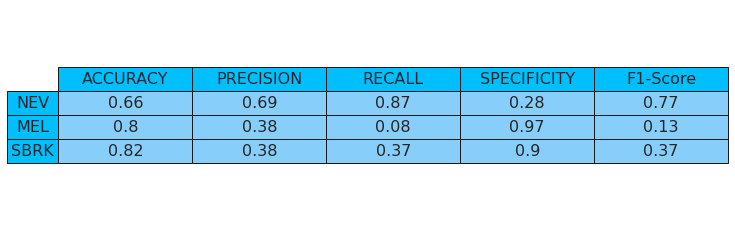

In [ ]:
def tableResults(nevus_statline, melanoma_statline, sbrk_statline):
    cellColor='lightskyblue'
    headerColor='deepskyblue'
    for i in range(len(nevus_statline)):
        nevus_statline[i] = round(nevus_statline[i], 2)
        melanoma_statline[i] = round(melanoma_statline[i], 2)
        sbrk_statline[i] = round(sbrk_statline[i], 2)
        
    theTable = plt.table(
        cellText=[
            nevus_statline,
            melanoma_statline,
            sbrk_statline
        ],
        cellColours=[
            [cellColor, cellColor, cellColor, cellColor, cellColor], 
            [cellColor, cellColor, cellColor, cellColor, cellColor], 
            [cellColor, cellColor, cellColor, cellColor, cellColor]
        ],
        cellLoc='center',
        rowLabels=['NEV', 'MEL', 'SBRK'],
        rowColours=[headerColor, headerColor, headerColor], 
        rowLoc='center',
        colLabels=['ACCURACY', 'PRECISION', 'RECALL', 'SPECIFICITY', 'F1-Score'],
        colColours=[headerColor, headerColor, headerColor, headerColor, headerColor],
        colLoc='center',
        loc='center'
    )
    theTable.auto_set_font_size(False)
    theTable.set_fontsize(16)
    theTable.scale(2, 2)
    ax=plt.gca()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.box(on=None)
    plt.show()

tableResults(nevus_stats, mel_stats, sbrk_stats)

As depicted in the output above, the DenseNet CNN Model achieved the highest F1-Score when classifying Nevus images (**77.00%**), followed by the second highest F1-score when classifying Seborrheic Keratosis images (**37.00%**), followed by the lowest F1-score when classifying Melanoma Images (**13.00%**). This descending order of F1-scores generally reflects the performance of each model when predicting a nevus, melonoma-positive, or seborrheic keratosis-positive skin image, respectively.

-------------------------------------------------------------
-------------------------------------------------------------





<a name="five"></a>
# **V. Discussion and Conclusion**

Section V provides a discussion and conclusion for the results of the analysis.

<a name="fivea"></a>
## *a) Discussion*

###**Interpreting the Results**

The F1-Scores depicted in the Table in [**Section IV**](#four) indicate that the DenseNet Convolutional Neural Network Model achieved the best performance when classifying nevus images (**77.00%**). However, even within the nevus classification, the performance of the model when determining nevus negatives was abysmal (**27.54%** nevus specificity). Similarly, the model possessed poor recall and sensitivity percentages for both the melanoma images and the seborrheic keratosis images (**8.00%** recall and **97.00%** sensitivity for the melanoma images, and **37.00%** recall and **9.00%** sensitivity for the seborrheic keratosis images, respectively). These relatively low percentages indicate that the model had trouble classifying melanoma and seborrheic keratosis images as positive when they were actually positive, yet had no trouble classifying these images as negative when they were actually negative. These results should be interpreted in the context of the dataset being heavily skewed by the high quantity of nevus images in comparison to the melanoma and seborrheic keratosis images overall. Nevertheless, the overall robustness and generalizability of the model was lower than expected, and definitely too low to be implemented in the real-world.

###**Errors and Limitations**

The low robustness and generalizability of the DenseNet CNN Model was likely attributed to several limitations discussed throughout the notebook. First and foremost comse the size of the dataset. Typical deep learning algorithms and architectures require approximately 100,000 pieces of data for a high robustness and generalizability. Our dataset, however, possessed a mere 2,750 images. To compound this inherent limitation, as shown in the distrubution plot in the final sub-section (c) of [**Section II: Image Preprocessing & Exploratory Analysis**](#dist), the dataset was heavily skewed in favor of nevus images relative to those of melanoma and seborrheic keratosis. This skew suggests a high imbalance in the dataset utilized, which resulted in overfitting to the nevus class, as observed by the low nevus specificity (**27.54%**), high melanoma sensitivity (**8.00%**), and high seborrheic keratosis sensitivity (**37.00%**).[$^{15}$](#ref15) 

Another inherent limitation of our model was the lack of computational resources in our possession. Since we only utilized Google Colaboratory, the resizing of our images was severely limited. For example, we had to downsample our images from median pixel dimensions of 3008x2000 to a square image size of 128x128 in order for our model to stay within Google Colab's resource usage limits. Furthermore, our model's architecture was constrained by Google Colab's limited computational allocation. Both of these computational-specific limitations required that we balance complexity with computational speed.

###**Future Avenues of Research**
Future avenues of possible research include utilizing a UNET model architecture in order to classify the images. The UNET model is a state-of-the-art model being heavily implemented as an medical image segmentation model, functioning by assigning labels for each pixel in any given image. Furthermore, the DenseNet CNN Model constructed in this notebook should be trained on a larger and more balanced dataset of skin lesion images in order to achieve higher generalizability and robustness. Finally, the analysis should be replicated with more computational power to reduce the downsampling of image data.

<a name="fiveb"></a>
## *b) Conclusion*
2,750 images containing indications to nevus, melanoma, or seborrheic keratosis skin lesions were classified through utilization of a DenseNet Convolutional Neural Network model. The model performed admirably despite several limitations primarily stemming from the computational resources and dataset utilized during training. For example, a **77.00%** F1-Score was achieved for the nevus images in the dataset, while traditional CNNs trained on this dataset displayed high tendencies to overfit the nevus data. Overall, the DenseNet CNN model performed well despite the overrepresentation of nevus images in the dataset, in addition to the restricted computational power. For future studies, the DenseNet model should be implemented with more powerful computational resources and a more evenly balanced dataset of skin lesion images.

-------------------------------------------------------------
-------------------------------------------------------------





<a name="six"></a>
# **VI. References**

<a name="ref1"></a>
1.   Melanoma - Symptoms and causes. Mayo Clinic. Accessed October 11, 2020. https://www.mayoclinic.org/diseases-conditions/melanoma/symptoms-causes/syc-20374884
<a name="ref2"></a>
2.   Glazer AM, Winkelmann RR, Farberg AS, Rigel DS. Analysis of Trends in US Melanoma Incidence and Mortality. JAMA Dermatol. 2017;153(2):225. doi:10.1001/jamadermatol.2016.4512
<a name="ref3"></a>
3.   American Cancer Society. What Is Melanoma Skin Cancer? | What Is Melanoma? Published August 14, 2019. Accessed October 11, 2020. https://www.cancer.org/cancer/melanoma-skin-cancer/about/what-is-melanoma.html
<a name="ref4"></a>
4.   Marghoob AA, Scope A. The complexity of diagnosing melanoma. J Invest Dermatol. 2009;129(1):11-13. doi:10.1038/jid.2008.388
<a name="ref5"></a>
5.   Melanoma - Diagnosis. Cancer.Net. Published June 25, 2012. Accessed October 31, 2020. https://www.cancer.net/cancer-types/melanoma/diagnosis
<a name="ref6"></a>
6.   Domingues B, Lopes JM, Soares P, Pópulo H. Melanoma treatment in review. ImmunoTargets Ther. 2018;7:35-49. doi:10.2147/ITT.S134842
<a name="ref7"></a>
7.   Halpern A, Marghoob A, Reiter O. Melanoma. The Skin Cancer Foundation. Accessed October 31, 2020. https://www.skincancer.org/skin-cancer-information/melanoma/
<a name="ref8"></a>
8.   Voss RK, Woods TN, Cromwell KD, Nelson KC, Cormier JN. Improving outcomes in patients with melanoma: strategies to ensure an early diagnosis. Patient Relat Outcome Meas. 2015;6:229-242. doi:10.2147/PROM.S69351
<a name="ref9"></a>
9.   Financial help for people who have skin cancer. Accessed October 31, 2020. https://www.aad.org/public/diseases/skin-cancer/types/common/melanoma/financial-help
<a name="ref10"></a>
10.  Fawzy FI, Fawzy NW, Hyun CS, et al. Malignant melanoma. Effects of an early structured psychiatric intervention, coping, and affective state on recurrence and survival 6 years later. Arch Gen Psychiatry. 1993;50(9):681-689. doi:10.1001/archpsyc.1993.01820210015002
<a name="ref11"></a>
11.   Melanoma Detection Dataset. Accessed October 31, 2020. https://kaggle.com/wanderdust/skin-lesion-analysis-toward-melanoma-detection
<a name="ref12"></a>
12.   Huang G, Liu Z, van der Maaten L, Weinberger KQ. Densely Connected Convolutional Networks. arXiv:160806993 [cs]. Published online January 28, 2018. Accessed December 6, 2020. http://arxiv.org/abs/1608.06993
<a name="ref13"></a>
13.   Dense Net Image Classification. Accessed December 6, 2020. https://kaggle.com/sohaibanwaar1203/dense-net-image-classification
<a name="ref14"></a>
14.   Mohajon J. Confusion Matrix for Your Multi-Class Machine Learning Model. Medium. Published September 9, 2020. Accessed December 6, 2020. https://towardsdatascience.com/confusion-matrix-for-your-multi-class-machine-learning-model-ff9aa3bf7826
<a name="ref15"></a>
15.   Raj JT. What To Do When Your Classification Dataset is Imbalanced. Medium. Published September 6, 2019. Accessed December 6, 2020. https://towardsdatascience.com/what-to-do-when-your-classification-dataset-is-imbalanced-6af031b12a36














-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------